In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

Reading data from folder titanic:

In [2]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [3]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.00,1,0,19877,78.8500,C46,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.00,0,0,11767,83.1583,C54,C


Looking at the sample of data:

cabin, name, and ticket: ignore for now

In [4]:
df_test.sample(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
276,1168,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S
134,1026,3,"Dintcheff, Mr. Valtcho",male,43.0,0,0,349226,7.8958,NaN,S


In [5]:
data_train = df_train[['Survived','Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data_test = df_test[['PassengerId', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [6]:
data_test.sample(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
307,1199,3,male,0.83,0,1,9.3500,S
415,1307,3,male,38.50,0,0,7.2500,S
119,1011,2,female,29.00,1,0,26.0000,S
16,908,2,male,35.00,0,0,12.3500,Q
232,1124,3,male,21.00,1,0,6.4958,S
52,944,2,female,20.00,2,1,23.0000,S
406,1298,2,male,23.00,1,0,10.5000,S
65,957,2,female,NaN,0,0,21.0000,S
116,1008,3,male,NaN,0,0,6.4375,C
41,933,1,male,NaN,0,0,26.5500,S


Check for null values:

In [7]:
data_test.isna().sum(axis=0)

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [8]:
data_train.isna().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Is it fine to ignore age considering the null values?

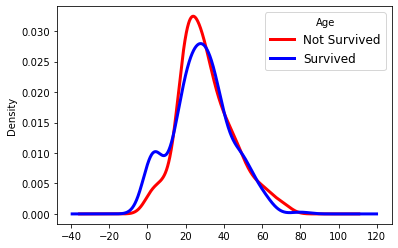

In [9]:
data_train.Age[(data_train.Survived == 0)].plot(kind="kde", linewidth = 3, color='red', label = 'Not Survived')
data_train.Age[data_train.Survived == 1].plot(kind="kde", linewidth = 3, color='blue', label = 'Survived')
plt.legend(prop={'size': 12}, title = 'Age');

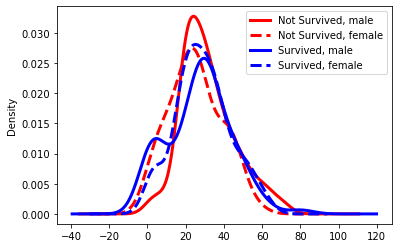

In [10]:
data_train.Age[(data_train.Survived == 0) & (data_train.Sex == 'male')].plot(kind="kde", linewidth = 3,\
                                                                             color='red', label = 'Not Survived, male')
data_train.Age[(data_train.Survived == 0) & (data_train.Sex == 'female')].plot(kind="kde", linewidth = 3,\
                                                                               color='red', label = 'Not Survived, female',linestyle ='--')
data_train.Age[(data_train.Survived == 1) & (data_train.Sex == 'male')].plot(kind="kde", linewidth = 3, \
                                                                             color='blue', label = 'Survived, male')
data_train.Age[(data_train.Survived == 1) & (data_train.Sex == 'female')].plot(kind="kde", linewidth = 3,\
                                                                               color='blue', label = 'Survived, female', linestyle ='--')
plt.legend(prop={'size': 10});

It seems that ae is important so we cannot ignore the age column.

How about Pclass?

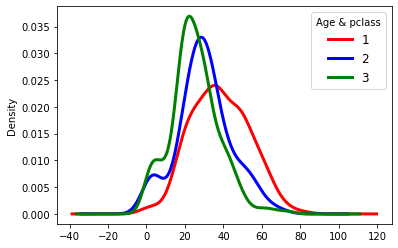

In [11]:
data_train.Age[(data_train.Pclass == 1)].plot(kind="kde", linewidth = 3, color='red', label = '1')
data_train.Age[data_train.Pclass == 2].plot(kind="kde", linewidth = 3, color='blue', label = '2')
data_train.Age[data_train.Pclass == 3].plot(kind="kde", linewidth = 3, color='green', label = '3')
plt.legend(prop={'size': 12}, title = 'Age & pclass');

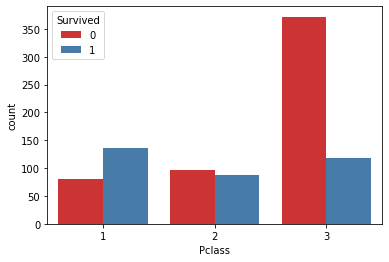

In [12]:
sns.countplot(data=data_train, x='Pclass', hue = ('Survived'),palette="Set1")

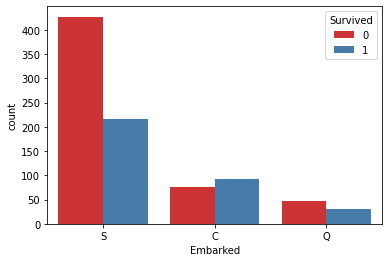

In [13]:
sns.countplot(data=data_train, x='Embarked', hue = ('Survived'), palette='Set1')

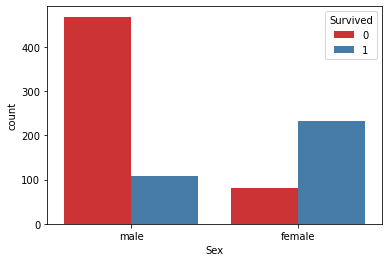

In [14]:
sns.countplot(data=data_train, x='Sex', hue = ('Survived'),palette="Set1")

Adding SibSP and Parch to find people who where alone?

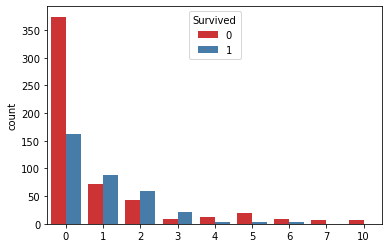

In [15]:
sns.countplot(data=data_train, x=data_train['SibSp']+data_train['Parch'], hue = ('Survived'), palette='Set1')

In [16]:
data_train.loc[data_train['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


There are 2 null values in Embarked! Based on Pclass and Fare we might be able to guess them!

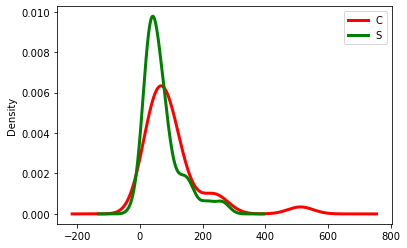

In [17]:
data_train.Fare[(data_train.Embarked == 'C')&(data_train.Pclass==1)].plot(kind="kde", linewidth = 3, color='red', label = 'C')
#data_train.Fare[(data_train.Embarked == 'Q')&(data_train.Pclass==1)].plot(kind="kde", linewidth = 3, color='blue', label = 'Q')
data_train.Fare[(data_train.Embarked == 'S')&(data_train.Pclass==1)].plot(kind="kde", linewidth = 3, color='green', label = 'S')
plt.legend()
#plt.xlim(0, 200)

It seems that C and S are both possible! We go with C for the embarked

In [18]:
data_train.Embarked[61]='C'
data_train.Embarked[829]='C'#data_train["Embarked"].fillna("C", inplace = True) 

In [19]:
data_train.loc[data_train['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


Checking the corelation between the chosen columns and Survived

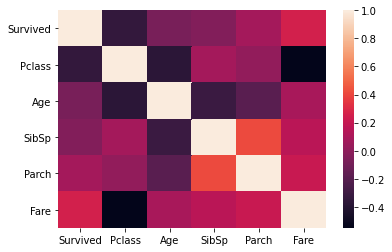

In [20]:
sns.heatmap(data_train.corr())

What are the best guesses for missing ages? 

In [21]:
missing_data = data_train[data_train['Age'].isnull()]
missing_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [22]:
data_test.sample(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
343,1235,1,female,58.0,0,1,512.3292,C
246,1138,2,female,22.0,0,0,21.0000,S
68,960,1,male,31.0,0,0,28.5375,C
163,1055,3,male,NaN,0,0,7.0000,S
193,1085,2,male,61.0,0,0,12.3500,Q
324,1216,1,female,39.0,0,0,211.3375,S
187,1079,3,male,17.0,2,0,8.0500,S
1,893,3,female,47.0,1,0,7.0000,S
367,1259,3,female,22.0,0,0,39.6875,S
79,971,3,female,24.0,0,0,7.7500,Q


Using the mean value based on the sex and pclass might not be too bad!

In [23]:
Group_Age = data_train.groupby(['Sex','Pclass'])['Age'].mean()
Group_Age

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [24]:
data_train['Age'] = data_train['Age'].fillna(data_train.groupby(['Sex','Pclass'])['Age'].transform('mean'))

In [25]:
data_train.isnull().sum(axis=0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
data_test['Age'] = data_test['Age'].fillna(data_test.groupby(['Sex','Pclass'])['Age'].transform('mean'))

In [27]:
data_test.isnull().sum(axis=0)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [28]:
data_test.loc[data_test['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [29]:
data_test['Fare'] = data_test['Fare'].fillna(data_test.groupby(['Pclass', 'Embarked'])['Fare'].transform('mean'))

Using LabelEncoder to convert text groups to group numbers:

In [30]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data_train['Sex'] = labelencoder.fit_transform(data_train['Sex'])
data_train['Embarked'] = labelencoder.fit_transform(data_train['Embarked'])
data_test['Sex'] = labelencoder.fit_transform(data_test['Sex'])
data_test['Embarked'] = labelencoder.fit_transform(data_test['Embarked'])

Creating a new column to see if sb was alone or not!

In [31]:
data_test.sample(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
304,1196,3,0,23.073400,0,0,7.7500,1
207,1099,2,1,24.000000,0,0,10.5000,2
43,935,2,0,30.000000,0,0,13.0000,2
158,1050,1,1,42.000000,0,0,26.5500,2
411,1303,1,0,37.000000,1,0,90.0000,1
289,1181,3,1,24.525104,0,0,8.0500,2
190,1082,2,1,34.000000,1,0,26.0000,2
377,1269,2,1,21.000000,0,0,11.5000,2
130,1022,3,1,32.000000,0,0,8.0500,2
115,1007,3,1,18.000000,1,0,14.4542,0


In [32]:
data_train['NotAlone'] = data_train['SibSp']+data_train['Parch']
data_test['NotAlone'] = data_test['SibSp']+data_test['Parch']

In [33]:
data_test.sample(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone
48,940,1,0,60.0000,0,0,76.2917,0,0
308,1200,1,1,55.0000,1,1,93.5000,2,2
19,911,3,0,45.0000,0,0,7.2250,0,0
331,1223,1,1,39.0000,0,0,29.7000,0,0
316,1208,1,1,57.0000,1,0,146.5208,0,1
313,1205,3,0,37.0000,0,0,7.7500,1,0
49,941,3,0,36.0000,0,2,15.9000,2,2
176,1068,2,0,20.0000,0,0,36.7500,2,0
52,944,2,0,20.0000,2,1,23.0000,2,3
21,913,3,1,9.0000,0,1,3.1708,2,1


In [34]:
data_train['NotAlone'].loc[data_train['NotAlone'] > 0] = 1 
data_test['NotAlone'].loc[data_test['NotAlone'] > 0] = 1 

In [35]:
#age_labels = [0, 1, 2, 3, 4, 5, 6, 7]
#data_train['age_group'] = pd.cut(data_train.Age, range(0, 81, 10), right=False, labels=age_labels)
#data_train[data_train['age_group'].isna()]=7

#age_labels = [0, 1, 2, 3, 4, 5, 6, 7]
#data_test['age_group'] = pd.cut(data_test.Age, range(0, 81, 10), right=False, labels=age_labels)
#data_test[data_test['age_group'].isna()]=7

In [36]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [37]:
data_test.sample(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone
403,1295,1,1,17.000000,0,0,47.1000,2,0
307,1199,3,1,0.830000,0,1,9.3500,2,1
283,1175,3,0,9.000000,1,1,15.2458,0,1
22,914,1,0,41.333333,0,0,31.6833,2,0
303,1195,3,1,24.000000,0,0,8.6625,2,0
221,1113,3,1,21.000000,0,0,8.0500,2,0
389,1281,3,1,6.000000,3,1,21.0750,2,1
293,1185,1,1,53.000000,1,1,81.8583,2,1
309,1201,3,0,45.000000,1,0,14.1083,2,1
17,909,3,1,21.000000,0,0,7.2250,0,0


Making 5 different groups for different age ranges:

In [38]:
age_labels = [0, 1, 2, 3, 4]
data_train['age_group'] = pd.qcut(data_train['Age'], q=5, labels=age_labels)
data_test['age_group'] = pd.qcut(data_test['Age'], q=5, labels=age_labels)

In [39]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone,age_group
0,0,3,1,22.00,1,0,7.2500,2,1,1
1,1,1,0,38.00,1,0,71.2833,0,1,3
2,1,3,0,26.00,0,0,7.9250,2,0,1
3,1,1,0,35.00,1,0,53.1000,2,1,3
4,0,3,1,35.00,0,0,8.0500,2,0,3
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,2,0,2
887,1,1,0,19.00,0,0,30.0000,2,0,0
888,0,3,0,21.75,1,2,23.4500,2,1,1
889,1,1,1,26.00,0,0,30.0000,0,0,1


In [40]:
data_test.sample(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone,age_group
100,992,1,0,43.000000,1,0,55.4417,0,1,4
83,975,3,1,24.525104,0,0,7.8958,2,0,1
186,1078,2,0,21.000000,0,1,21.0000,2,1,0
114,1006,1,0,63.000000,1,0,221.7792,2,1,4
248,1140,2,0,29.000000,1,0,26.0000,2,1,2
109,1001,2,1,18.500000,0,0,13.0000,2,0,0
125,1017,3,0,17.000000,0,1,16.1000,2,1,0
355,1247,1,1,50.000000,0,0,26.0000,2,0,4
207,1099,2,1,24.000000,0,0,10.5000,2,0,1
85,977,3,1,24.525104,1,0,14.4542,0,1,1


Creating a new column for Fare and in this column the price equal or more than 250 is considered 250!

In [41]:
data_train['approx_Fare'] = data_train['Fare'] 
data_train['approx_Fare'].loc[data_train['approx_Fare'] > 250] = 250
#data_test.loc[data_test['Fare'] > 150] = 1 
data_test['approx_Fare'] = data_test['Fare'] 
data_test['approx_Fare'].loc[data_test['approx_Fare'] > 250] = 250

Creating 10 groups based on the Fare:

In [42]:
age_labels = [0, 1, 2, 3, 4, 5, 6,7, 8,9]
data_train['approx_Fare'] = pd.qcut(data_train['approx_Fare'], q=10, labels=age_labels,precision=0, duplicates='drop')
data_test['approx_Fare'] = pd.qcut(data_test['approx_Fare'], q=10, labels=age_labels,precision=0, duplicates='drop')

In [43]:
data_train.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone,age_group,approx_Fare
390,1,1,1,36.00,1,2,120.0000,2,1,3,9
533,1,3,0,21.75,0,2,22.3583,0,1,1,6
431,1,3,0,21.75,1,0,16.1000,2,1,1,5


In [44]:
data_test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone,age_group,approx_Fare
209,1101,3,1,25.000000,0,0,7.8958,2,0,2,2
403,1295,1,1,17.000000,0,0,47.1000,2,0,0,8
84,976,2,1,30.940678,0,0,10.7083,1,0,3,3


In [45]:
XTRAIN = data_train[['Pclass', 'Sex', 'Embarked', 'NotAlone','age_group','approx_Fare']]
YTRAIN = data_train['Survived']
XTEST = data_test[['PassengerId','Pclass', 'Sex', 'Embarked', 'NotAlone','age_group','approx_Fare']]

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XTRAIN, YTRAIN, test_size=0.2)

In [47]:
y_test.shape, y_train.shape

((179,), (712,))

In [48]:
from sklearn.linear_model import LogisticRegression # C inverse of regularization
logistic_model = LogisticRegression(penalty = 'l2', C=0.5, solver = 'liblinear').fit(x_train, y_train)

In [49]:
y_pred = logistic_model.predict(x_test)

In [50]:
#y_test.reset_index(drop=True, inplace=True)

In [51]:
pd.DataFrame(y_test , index=None)

,Survived
333,0
597,0
116,0
140,0
791,0
...,...
274,1
55,1
817,0
26,0


In [52]:
pred_results = pd.DataFrame({'y_test': y_test,
                             
                           'y_pred':y_pred})
pred_results

,y_test,y_pred
333,0,0
597,0,0
116,0,0
140,0,1
791,0,0
...,...,...
274,1,1
55,1,0
817,0,0
26,0,0


In [53]:
data_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
data_crosstab

y_test,0,1
y_pred,,
0,97,20
1,14,48


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [55]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ', prec) #how many of the passengers model tought survive and they survive
print('recall: ', recall) #how many of the actual survivors did the model corrrectly predict

Accuracy:  0.8100558659217877
Precision:  0.7741935483870968
recall:  0.7058823529411765


In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [57]:
result_dict = {}

In [58]:
def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return{'accuracy':acc,
          'precision':prec,
          'recall':recall,
          'accuracy_count':num_acc}
    

In [59]:
def build_model(classifier_fn,
               name_of_y_col,
               names_of_x_cols,
               dataset,
               test_frac=0.2):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = classifier_fn(x_train,y_train)
    
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test':y_test,
                                'y_pred':y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return{'training':train_summary,
          'test':test_summary,
          'confusion_matrix':model_crosstab}

In [60]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)
        
        print()
        print("Training data")
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        print()

        print("Testing data")
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
            
        print()

In [61]:
names_of_x_cols = ['Pclass', 'Sex', 'Embarked', 'NotAlone','age_group','approx_Fare']
name_of_y_col = 'Survived'

In [62]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear', C=2.0)
    model.fit(x_train, y_train)
    
    return model

In [63]:
result_dict['survived ~ logistic'] = build_model(logistic_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.8047752808988764
precision 0.7606177606177607
recall 0.718978102189781
accuracy_count 573

Testing data
accuracy 0.7486033519553073
precision 0.676923076923077
recall 0.6470588235294118
accuracy_count 134



In [64]:
def linear_discriminant_fn(x_train, y_train, solver ='svd'):
    model = LinearDiscriminantAnalysis(solver = solver)
    model.fit(x_train, y_train)
    
    return model

In [65]:
result_dict['survived ~ linear_discriminant_fn'] = build_model(linear_discriminant_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)



In [66]:
def quadratic_discriminant_fn(x_train, y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)
    
    return model

In [67]:
result_dict['survived ~ quadratic_discriminant_fn'] = build_model(quadratic_discriminant_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)



In [68]:
def sgd_fn(x_train, y_train,max_iter = 100000, tol = 1e-3):
    model = SGDClassifier(max_iter= max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

In [69]:
result_dict['survived ~ sgd_fn'] = build_model(sgd_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)



In [70]:
def linear_svc_fn(x_train, y_train,C = 1.0, max_iter = 100000, tol = 1e-3): #smaller value of c stronger regularization penalize points on the wrong side
    model = LinearSVC(max_iter= max_iter, tol=tol, dual =False) #dual = False in linear SVCn_sample > n_feature
    model.fit(x_train, y_train)
    
    return model

In [71]:
result_dict['survived ~ linear_svc_fn'] = build_model(linear_svc_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)



In [72]:
def radius_neighbors_fn(x_train, y_train,radius = 40.0):
    model = RadiusNeighborsClassifier(radius = radius)
    model.fit(x_train, y_train)
    
    return model

In [73]:
result_dict['survived ~ radius_neighbors_fn'] = build_model(radius_neighbors_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)

In [74]:
def decision_tree_fn(x_train, y_train,max_depth =4, max_features= None):
    model = DecisionTreeClassifier(max_depth= max_depth, max_features= max_features) 
    model.fit(x_train, y_train)
    
    return model

result_dict['survived ~ decision_tree_fn'] = build_model(decision_tree_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)

In [75]:
def naive_bayes_fn(x_train, y_train,priors= None):
    model = GaussianNB(priors=priors) 
    model.fit(x_train, y_train)
    
    return model

result_dict['survived ~ naive_bayes_fn'] = build_model(naive_bayes_fn,
                                                name_of_y_col,
                                                names_of_x_cols,
                                                data_train)

In [76]:
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.8047752808988764
precision 0.7606177606177607
recall 0.718978102189781
accuracy_count 573

Testing data
accuracy 0.7486033519553073
precision 0.676923076923077
recall 0.6470588235294118
accuracy_count 134

Classification:  survived ~ linear_discriminant_fn

Training data
accuracy 0.7921348314606742
precision 0.74609375
recall 0.6970802919708029
accuracy_count 564

Testing data
accuracy 0.7988826815642458
precision 0.7580645161290323
recall 0.6911764705882353
accuracy_count 143

Classification:  survived ~ quadratic_discriminant_fn

Training data
accuracy 0.8047752808988764
precision 0.7396226415094339
recall 0.7368421052631579
accuracy_count 573

Testing data
accuracy 0.8268156424581006
precision 0.8260869565217391
recall 0.75
accuracy_count 148

Classification:  survived ~ sgd_fn

Training data
accuracy 0.7570224719101124
precision 0.6424581005586593
recall 0.8363636363636363
accuracy_count 539

Testing data
accuracy 0.715

In [77]:
quadratic_discriminant_fn = QuadraticDiscriminantAnalysis().fit(XTRAIN, YTRAIN)

In [78]:
y_pred_QD = quadratic_discriminant_fn.predict(XTEST.drop(['PassengerId'],axis=1))

In [79]:
df_y_QD = pd.DataFrame({'PassengerId' : XTEST['PassengerId'], 'Survived': y_pred_QD})

In [81]:
df_y_QD.to_csv('titanic/Titanic_QD.csv',index=False)

In [ ]:
logistic_model_2 = LogisticRegression(penalty = 'l2', C=1.0, solver = 'lbfgs').fit(XTRAIN, YTRAIN)

In [ ]:
y_pred_2 = logistic_model.predict(XTEST.drop(['PassengerId'],axis=1))

In [ ]:
df_y = pd.DataFrame({'PassengerId' : XTEST['PassengerId'], 'Survived': y_pred_2})

df_y

In [ ]:
df_y.to_csv('titanic/Titanic_LR.csv',index=False)